Time step 0/500
Time step 100/500
Time step 200/500
Time step 300/500
Time step 400/500


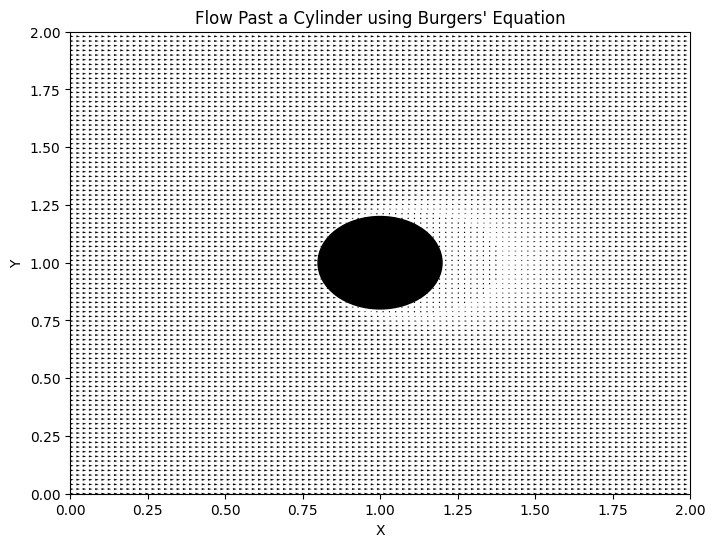

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Parameters
nx, ny = 100, 100          # Number of grid points
Lx, Ly = 2.0, 2.0          # Domain size
dx, dy = Lx/(nx-1), Ly/(ny-1)  # Grid spacing
nu = 0.01                  # Viscosity
dt = 0.001                 # Time step
nt = 500                   # Number of time steps

# Create grid
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Initialize velocity fields
u = np.ones((ny, nx))      # Initial u velocity
v = np.zeros((ny, nx))     # Initial v velocity

# Inflow condition: u = 1.0 at the left boundary
u[:, 0] = 1.0

# Define cylinder parameters
cylinder_radius = 0.2
cylinder_center = (1.0, 1.0)

# Create cylinder mask
distance = np.sqrt((X - cylinder_center[0])**2 + (Y - cylinder_center[1])**2)
cylinder = distance < cylinder_radius

# Time-stepping loop
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    
    # Compute derivatives
    u_x = (un[1:-1, 2:] - un[1:-1, 0:-2]) / (2*dx)
    u_y = (un[2:, 1:-1] - un[0:-2, 1:-1]) / (2*dy)
    v_x = (vn[1:-1, 2:] - vn[1:-1, 0:-2]) / (2*dx)
    v_y = (vn[2:, 1:-1] - vn[0:-2, 1:-1]) / (2*dy)
    
    u_xx = (un[1:-1, 2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]) / dx**2
    u_yy = (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) / dy**2
    v_xx = (vn[1:-1, 2:] - 2*vn[1:-1,1:-1] + vn[1:-1,0:-2]) / dx**2
    v_yy = (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1]) / dy**2
    
    # Update velocity fields using Burgers' equation
    u[1:-1,1:-1] = (un[1:-1,1:-1] 
                     - dt * (un[1:-1,1:-1] * u_x + vn[1:-1,1:-1] * u_y)
                     + nu * dt * (u_xx + u_yy))
    
    v[1:-1,1:-1] = (vn[1:-1,1:-1] 
                     - dt * (un[1:-1,1:-1] * v_x + vn[1:-1,1:-1] * v_y)
                     + nu * dt * (v_xx + v_yy))
    
    # Apply boundary conditions
    u[:, 0] = 1.0          # Inflow
    u[:, -1] = u[:, -2]    # Outflow
    u[0, :] = u[1, :]      # Top boundary
    u[-1, :] = u[-2, :]    # Bottom boundary
    
    v[:, 0] = v[:, 1]      # Inflow
    v[:, -1] = v[:, -2]    # Outflow
    v[0, :] = v[1, :]      # Top boundary
    v[-1, :] = v[-2, :]    # Bottom boundary
    
    # Apply no-slip condition on the cylinder
    u[cylinder] = 0
    v[cylinder] = 0
    
    # Optional: Print progress
    if n % 100 == 0:
        print(f'Time step {n}/{nt}')

# Visualization
plt.figure(figsize=(8,6))
plt.quiver(X, Y, u, v)
circle = plt.Circle(cylinder_center, cylinder_radius, color='k')
plt.gca().add_patch(circle)
plt.title('Flow Past a Cylinder using Burgers\' Equation')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, Lx)
plt.ylim(0, Ly)
plt.show()


Time step 0/1000
Time step 200/1000
Time step 400/1000
Time step 600/1000
Time step 800/1000


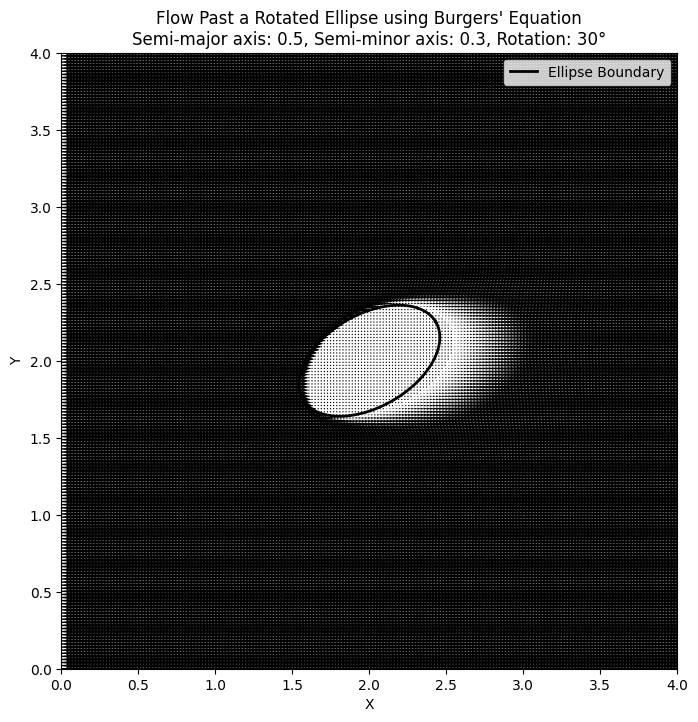

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Parameters
nx, ny = 200, 200          # Number of grid points (increased for better resolution)
Lx, Ly = 4.0, 4.0          # Domain size
dx, dy = Lx/(nx-1), Ly/(ny-1)  # Grid spacing
nu = 0.01                  # Viscosity
dt = 0.001                 # Time step
nt = 1000                  # Number of time steps

# Ellipse Parameters
a = 0.5                    # Semi-major axis
b = 0.3                    # Semi-minor axis
theta_deg = 30             # Rotation angle in degrees

# Convert rotation angle to radians
theta = np.radians(theta_deg)

# Create grid
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Initialize velocity fields
u = np.ones((ny, nx))      # Initial u velocity
v = np.zeros((ny, nx))     # Initial v velocity

# Inflow condition: u = 1.0 at the left boundary
u[:, 0] = 1.0

# Define ellipse center
ellipse_center = (Lx/2, Ly/2)

# Create rotated ellipse mask
# Apply rotation to the coordinate system
X_rot = (X - ellipse_center[0]) * np.cos(theta) + (Y - ellipse_center[1]) * np.sin(theta)
Y_rot = -(X - ellipse_center[0]) * np.sin(theta) + (Y - ellipse_center[1]) * np.cos(theta)

# Equation of ellipse: (X_rot/a)^2 + (Y_rot/b)^2 < 1
ellipse = (X_rot/a)**2 + (Y_rot/b)**2 < 1

# Time-stepping loop
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    
    # Compute derivatives using central differences
    # Interior points: 1 to -1
    # Handle u and v separately
    # u velocity
    u_x = (un[1:-1, 2:] - un[1:-1, 0:-2]) / (2*dx)
    u_y = (un[2:, 1:-1] - un[0:-2, 1:-1]) / (2*dy)
    u_xx = (un[1:-1, 2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]) / dx**2
    u_yy = (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) / dy**2
    
    # v velocity
    v_x = (vn[1:-1, 2:] - vn[1:-1, 0:-2]) / (2*dx)
    v_y = (vn[2:, 1:-1] - vn[0:-2, 1:-1]) / (2*dy)
    v_xx = (vn[1:-1, 2:] - 2*vn[1:-1,1:-1] + vn[1:-1,0:-2]) / dx**2
    v_yy = (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1]) / dy**2
    
    # Update velocity fields using Burgers' equation
    u[1:-1,1:-1] = (un[1:-1,1:-1] 
                     - dt * (un[1:-1,1:-1] * u_x + vn[1:-1,1:-1] * u_y)
                     + nu * dt * (u_xx + u_yy))
    
    v[1:-1,1:-1] = (vn[1:-1,1:-1] 
                     - dt * (un[1:-1,1:-1] * v_x + vn[1:-1,1:-1] * v_y)
                     + nu * dt * (v_xx + v_yy))
    
    # Apply boundary conditions
    # Inflow
    u[:, 0] = 1.0
    v[:, 0] = 0.0
    
    # Outflow (Neumann condition)
    u[:, -1] = u[:, -2]
    v[:, -1] = v[:, -2]
    
    # Top and bottom boundaries (Neumann conditions)
    u[0, :] = u[1, :]
    u[-1, :] = u[-2, :]
    v[0, :] = v[1, :]
    v[-1, :] = v[-2, :]
    
    # Apply no-slip condition on the ellipse
    u[ellipse] = 0
    v[ellipse] = 0
    
    # Optional: Print progress
    if n % 200 == 0:
        print(f'Time step {n}/{nt}')

# Visualization
plt.figure(figsize=(8,8))
plt.quiver(X, Y, u, v, scale=50)
ellipse_patch = plt.Circle(ellipse_center, a, color='k', fill=False, linewidth=2, label='Ellipse Boundary')

# To represent the rotated ellipse accurately, plot using parametric equations
theta_plot = np.linspace(0, 2*np.pi, 100)
x_ellipse = a * np.cos(theta_plot)
y_ellipse = b * np.sin(theta_plot)

# Rotate ellipse
x_rot = x_ellipse * np.cos(theta) - y_ellipse * np.sin(theta) + ellipse_center[0]
y_rot = x_ellipse * np.sin(theta) + y_ellipse * np.cos(theta) + ellipse_center[1]

plt.plot(x_rot, y_rot, 'k', linewidth=2, label='Ellipse Boundary')

plt.title(f'Flow Past a Rotated Ellipse using Burgers\' Equation\nSemi-major axis: {a}, Semi-minor axis: {b}, Rotation: {theta_deg}°')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, Lx)
plt.ylim(0, Ly)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


Time step 0/1000
Time step 200/1000
Time step 400/1000
Time step 600/1000
Time step 800/1000

Approximated Lift on the Ellipse: 0.00000 units


/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_46652/2057849124.py:112: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  F_in = rho * simps(v_in, y)
/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_46652/2057849124.py:113: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  F_out = rho * simps(v_out, y)


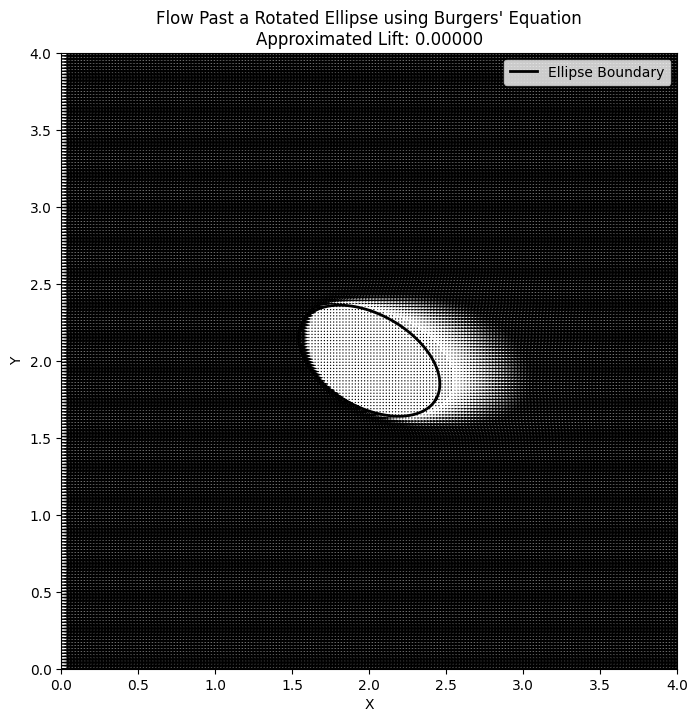

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Simulation Parameters
nx, ny = 200, 200
Lx, Ly = 4.0, 4.0
dx, dy = Lx/(nx-1), Ly/(ny-1)
nu = 0.01
dt = 0.001
nt = 1000

# Ellipse Parameters
a_initial = 0.5
b_initial = 0.3
theta_deg_initial = -30
theta = np.radians(theta_deg_initial)
ellipse_center = (Lx/2, Ly/2)

# Create grid
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Initialize velocity fields
u = np.ones((ny, nx))
v = np.zeros((ny, nx))
u[:, 0] = 1.0  # Inflow condition

# Function to create ellipse mask
def create_ellipse_mask(a, b, theta_deg, center=(Lx/2, Ly/2)):
    theta_rad = np.radians(theta_deg)
    X_rot = (X - center[0]) * np.cos(theta_rad) + (Y - center[1]) * np.sin(theta_rad)
    Y_rot = -(X - center[0]) * np.sin(theta_rad) + (Y - center[1]) * np.cos(theta_rad)
    return (X_rot/a)**2 + (Y_rot/b)**2 < 1

# Initial ellipse mask
ellipse = create_ellipse_mask(a_initial, b_initial, theta_deg_initial)

# Precompute indices for control volume boundaries
# Define control volume boundaries relative to the ellipse
# Assume ellipse is centered at (Lx/2, Ly/2)
buffer = 0.5  # Buffer distance from ellipse to control volume boundaries
x_in = ellipse_center[0] - buffer
x_out = ellipse_center[0] + buffer

# Find nearest grid indices
ix_in = np.argmin(np.abs(x - x_in))
ix_out = np.argmin(np.abs(x - x_out))

# Time-stepping loop
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    
    # Compute derivatives using central differences
    u_x = (un[1:-1, 2:] - un[1:-1, 0:-2]) / (2*dx)
    u_y = (un[2:, 1:-1] - un[0:-2, 1:-1]) / (2*dy)
    u_xx = (un[1:-1, 2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]) / dx**2
    u_yy = (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) / dy**2
    
    v_x = (vn[1:-1, 2:] - vn[1:-1, 0:-2]) / (2*dx)
    v_y = (vn[2:, 1:-1] - vn[0:-2, 1:-1]) / (2*dy)
    v_xx = (vn[1:-1, 2:] - 2*vn[1:-1,1:-1] + vn[1:-1,0:-2]) / dx**2
    v_yy = (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1]) / dy**2
    
    # Update velocity fields using Burgers' equation
    u[1:-1,1:-1] = (un[1:-1,1:-1] 
                     - dt * (un[1:-1,1:-1] * u_x + vn[1:-1,1:-1] * u_y)
                     + nu * dt * (u_xx + u_yy))
    
    v[1:-1,1:-1] = (vn[1:-1,1:-1] 
                     - dt * (un[1:-1,1:-1] * v_x + vn[1:-1,1:-1] * v_y)
                     + nu * dt * (v_xx + v_yy))
    
    # Apply boundary conditions
    u[:, 0] = 1.0  # Inflow
    v[:, 0] = 0.0
    
    u[:, -1] = u[:, -2]  # Outflow
    v[:, -1] = v[:, -2]
    
    u[0, :] = u[1, :]    # Top boundary
    u[-1, :] = u[-2, :]  # Bottom boundary
    v[0, :] = v[1, :]    # Top boundary
    v[-1, :] = v[-2, :]  # Bottom boundary
    
    # Update ellipse mask (if parameters change; static here)
    # ellipse = create_ellipse_mask(a_initial, b_initial, theta_deg_initial)
    
    # Apply no-slip condition on the ellipse
    u[ellipse] = 0
    v[ellipse] = 0
    
    # Optional: Print progress
    if n % 200 == 0:
        print(f'Time step {n}/{nt}')

# Approximate Lift Calculation using Momentum Theory
# Extract velocity profiles at control volume boundaries
# Inflow at ix_in, Outflow at ix_out

# Extract vertical velocity (v) profiles
v_in = v[:, ix_in]
v_out = v[:, ix_out]

# Integrate vertical momentum flux across inflow and outflow boundaries
# Assuming uniform density, set rho = 1 for simplicity
rho = 1.0

# Use Simpson's rule for numerical integration
F_in = rho * simps(v_in, y)
F_out = rho * simps(v_out, y)

# Approximate Lift
Lift = F_out - F_in

print(f'\nApproximated Lift on the Ellipse: {Lift:.5f} units')

# Visualization
plt.figure(figsize=(8,8))
plt.quiver(X, Y, u, v, scale=50)
# Plot rotated ellipse
theta_plot = np.linspace(0, 2*np.pi, 100)
x_ellipse = a_initial * np.cos(theta_plot)
y_ellipse = b_initial * np.sin(theta_plot)
x_rot = x_ellipse * np.cos(theta) - y_ellipse * np.sin(theta) + ellipse_center[0]
y_rot = x_ellipse * np.sin(theta) + y_ellipse * np.cos(theta) + ellipse_center[1]
plt.plot(x_rot, y_rot, 'k', linewidth=2, label='Ellipse Boundary')
plt.title(f'Flow Past a Rotated Ellipse using Burgers\' Equation\nApproximated Lift: {Lift:.5f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, Lx)
plt.ylim(0, Ly)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


Time step 0/1000
Time step 200/1000
Time step 400/1000
Time step 600/1000
Time step 800/1000

Approximated Lift on the Ellipse: -0.00014 units


/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_46652/2312426537.py:108: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  F_in = rho * simps(v_in, y)
/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_46652/2312426537.py:109: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  F_out = rho * simps(v_out, y)


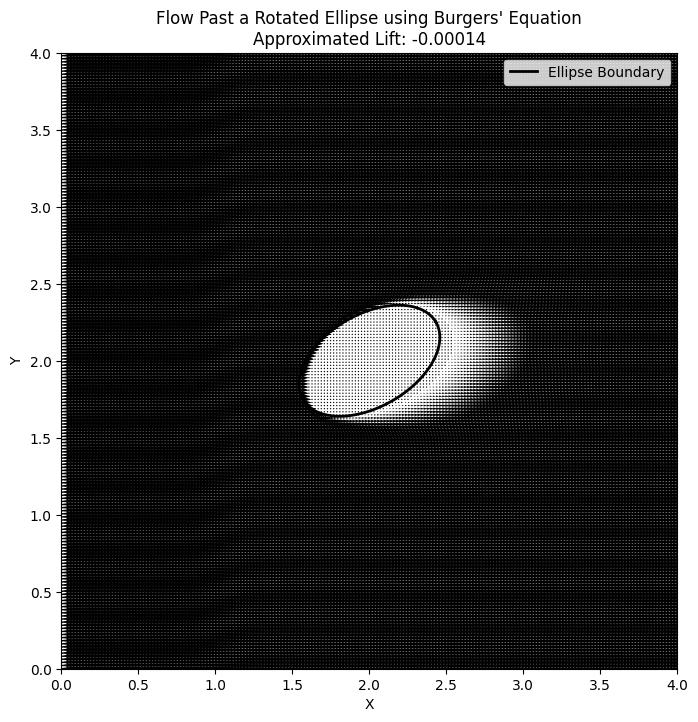

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Simulation Parameters
nx, ny = 200, 200
Lx, Ly = 4.0, 4.0
dx, dy = Lx/(nx-1), Ly/(ny-1)
nu = 0.01
dt = 0.001
nt = 1000

# Ellipse Parameters
a_initial = 0.5
b_initial = 0.3
theta_deg_initial = 30  # Angle of Attack in degrees
theta = np.radians(theta_deg_initial)
ellipse_center = (Lx/2, Ly/2)

# Create grid
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Initialize velocity fields
u = np.ones((ny, nx))
v = np.zeros((ny, nx))
u[:, 0] = 1.0  # Inflow condition
v[:, 0] = 0.1  # Introduce vertical inflow component

# Function to create ellipse mask
def create_ellipse_mask(a, b, theta_deg, center=(Lx/2, Ly/2)):
    theta_rad = np.radians(theta_deg)
    X_rot = (X - center[0]) * np.cos(theta_rad) + (Y - center[1]) * np.sin(theta_rad)
    Y_rot = -(X - center[0]) * np.sin(theta_rad) + (Y - center[1]) * np.cos(theta_rad)
    return (X_rot/a)**2 + (Y_rot/b)**2 < 1

# Initial ellipse mask
ellipse = create_ellipse_mask(a_initial, b_initial, theta_deg_initial)

# Precompute indices for control volume boundaries
buffer = 0.5  # Buffer distance from ellipse to control volume boundaries
x_in = ellipse_center[0] - buffer
x_out = ellipse_center[0] + buffer

# Find nearest grid indices
ix_in = np.argmin(np.abs(x - x_in))
ix_out = np.argmin(np.abs(x - x_out))

# Time-stepping loop
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    
    # Compute derivatives using central differences
    u_x = (un[1:-1, 2:] - un[1:-1, 0:-2]) / (2*dx)
    u_y = (un[2:, 1:-1] - un[0:-2, 1:-1]) / (2*dy)
    u_xx = (un[1:-1, 2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]) / dx**2
    u_yy = (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) / dy**2
    
    v_x = (vn[1:-1, 2:] - vn[1:-1, 0:-2]) / (2*dx)
    v_y = (vn[2:, 1:-1] - vn[0:-2, 1:-1]) / (2*dy)
    v_xx = (vn[1:-1, 2:] - 2*vn[1:-1,1:-1] + vn[1:-1,0:-2]) / dx**2
    v_yy = (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1]) / dy**2
    
    # Update velocity fields using Burgers' equation
    u[1:-1,1:-1] = (un[1:-1,1:-1] 
                     - dt * (un[1:-1,1:-1] * u_x + vn[1:-1,1:-1] * u_y)
                     + nu * dt * (u_xx + u_yy))
    
    v[1:-1,1:-1] = (vn[1:-1,1:-1] 
                     - dt * (un[1:-1,1:-1] * v_x + vn[1:-1,1:-1] * v_y)
                     + nu * dt * (v_xx + v_yy))
    
    # Apply boundary conditions
    u[:, 0] = 1.0  # Inflow
    v[:, 0] = 0.1  # Vertical inflow component
    
    u[:, -1] = u[:, -2]  # Outflow
    v[:, -1] = v[:, -2]
    
    u[0, :] = u[1, :]    # Top boundary
    u[-1, :] = u[-2, :]  # Bottom boundary
    v[0, :] = v[1, :]    # Top boundary
    v[-1, :] = v[-2, :]  # Bottom boundary
    
    # Apply no-slip condition on the ellipse
    u[ellipse] = 0
    v[ellipse] = 0
    
    # Optional: Print progress
    if n % 200 == 0:
        print(f'Time step {n}/{nt}')

# Approximate Lift Calculation using Momentum Theory
# Extract velocity profiles at control volume boundaries
# Inflow at ix_in, Outflow at ix_out

# Extract vertical velocity (v) profiles
v_in = v[:, ix_in]
v_out = v[:, ix_out]

# Integrate vertical momentum flux across inflow and outflow boundaries
# Assuming uniform density, set rho = 1 for simplicity
rho = 1.0

# Use Simpson's rule for numerical integration
F_in = rho * simps(v_in, y)
F_out = rho * simps(v_out, y)

# Approximate Lift
Lift = F_out - F_in

print(f'\nApproximated Lift on the Ellipse: {Lift:.5f} units')

# Visualization
plt.figure(figsize=(8,8))
plt.quiver(X, Y, u, v, scale=50)
# Plot rotated ellipse
theta_plot = np.linspace(0, 2*np.pi, 100)
x_ellipse = a_initial * np.cos(theta_plot)
y_ellipse = b_initial * np.sin(theta_plot)
x_rot = x_ellipse * np.cos(theta) - y_ellipse * np.sin(theta) + ellipse_center[0]
y_rot = x_ellipse * np.sin(theta) + y_ellipse * np.cos(theta) + ellipse_center[1]
plt.plot(x_rot, y_rot, 'k', linewidth=2, label='Ellipse Boundary')
plt.title(f'Flow Past a Rotated Ellipse using Burgers\' Equation\nApproximated Lift: {Lift:.5f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, Lx)
plt.ylim(0, Ly)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (51,) and (13,)

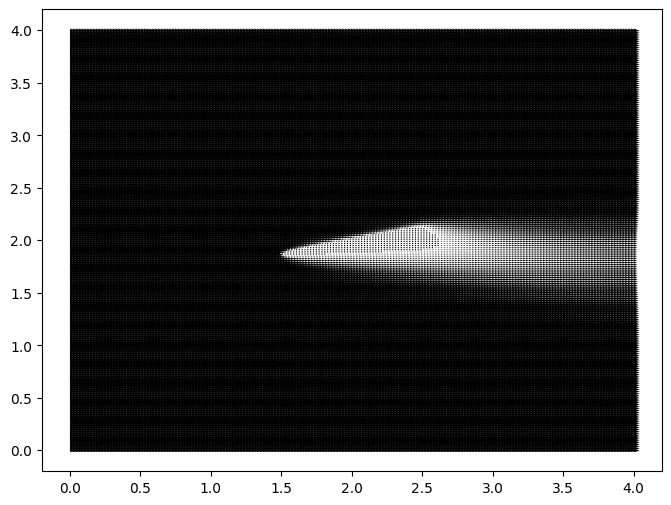

In [15]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import simps

# # Simulation Parameters
# nx, ny = 200, 200          # Number of grid points
# Lx, Ly = 4.0, 4.0          # Domain size
# dx, dy = Lx/(nx-1), Ly/(ny-1)  # Grid spacing
# nu = 0.01                  # Kinematic viscosity
# dt = 0.001                 # Time step
# nt = 5000                  # Number of time steps

# # Inclined Plane Parameters
# plane_length = 1.0         # Length of the inclined plane
# plane_thickness = 0.05     # Thickness of the plane
# angle_deg = 15             # Angle of attack in degrees
# angle_rad = np.radians(angle_deg)

# # Create grid
# x = np.linspace(0, Lx, nx)
# y = np.linspace(0, Ly, ny)
# X, Y = np.meshgrid(x, y)

# # Initialize velocity fields
# u = np.ones((ny, nx)) * 1.0  # Initial u velocity (free-stream velocity)
# v = np.zeros((ny, nx))       # Initial v velocity

# # Introduce vertical inflow component to break symmetry
# v_inflow = -0.1
# v[:, 0] = v_inflow

# # Define inclined plane geometry
# # Center the plane in the domain
# plane_center = (Lx/2, Ly/2)

# # Calculate endpoints of the plane
# half_length = plane_length / 2
# x_start = plane_center[0] - half_length * np.cos(angle_rad)
# y_start = plane_center[1] - half_length * np.sin(angle_rad)
# x_end = plane_center[0] + half_length * np.cos(angle_rad)
# y_end = plane_center[1] + half_length * np.sin(angle_rad)

# # Create a mask for the inclined plane using Bresenham's line algorithm
# from skimage.draw import line

# # Get integer indices for plane endpoints
# i_start, j_start = int(y_start / dy), int(x_start / dx)
# i_end, j_end = int(y_end / dy), int(x_end / dx)

# # Get pixels along the plane
# rr, cc = line(i_start, j_start, i_end, j_end)
# plane_mask = np.zeros((ny, nx), dtype=bool)
# plane_mask[rr, cc] = True

# # Thickness: Extend the mask perpendicularly to the plane
# # Calculate perpendicular direction
# perp_angle = angle_rad + np.pi/2
# thickness_pixels = int(plane_thickness / dy)
# for offset in range(-thickness_pixels, thickness_pixels + 1):
#     rr_offset = rr + int(offset * np.cos(perp_angle))
#     cc_offset = cc + int(offset * np.sin(perp_angle))
#     valid = (rr_offset >= 0) & (rr_offset < ny) & (cc_offset >= 0) & (cc_offset < nx)
#     plane_mask[rr_offset[valid], cc_offset[valid]] = True

# # Time-stepping loop
# for n in range(nt):
#     un = u.copy()
#     vn = v.copy()
    
#     # Compute derivatives using central differences
#     # Interior points: 1 to -1
#     u_x = (un[1:-1, 2:] - un[1:-1, 0:-2]) / (2*dx)
#     u_y = (un[2:, 1:-1] - un[0:-2, 1:-1]) / (2*dy)
#     v_x = (vn[1:-1, 2:] - vn[1:-1, 0:-2]) / (2*dx)
#     v_y = (vn[2:, 1:-1] - vn[0:-2, 1:-1]) / (2*dy)
    
#     # Compute second derivatives
#     u_xx = (un[1:-1, 2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]) / dx**2
#     u_yy = (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) / dy**2
#     v_xx = (vn[1:-1, 2:] - 2*vn[1:-1,1:-1] + vn[1:-1,0:-2]) / dx**2
#     v_yy = (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1]) / dy**2
    
#     # Update velocity fields using Burgers' equations
#     u_new = (un[1:-1,1:-1] 
#              - dt * (un[1:-1,1:-1] * u_x + vn[1:-1,1:-1] * u_y)
#              + nu * dt * (u_xx + u_yy))
    
#     v_new = (vn[1:-1,1:-1] 
#              - dt * (un[1:-1,1:-1] * v_x + vn[1:-1,1:-1] * v_y)
#              + nu * dt * (v_xx + v_yy))
    
#     # Assign updated velocities
#     u[1:-1,1:-1] = u_new
#     v[1:-1,1:-1] = v_new
    
#     # Apply boundary conditions
#     # Inflow (left boundary)
#     u[:, 0] = 1.0
#     v[:, 0] = v_inflow
    
#     # Outflow (right boundary) - Neumann (zero-gradient)
#     u[:, -1] = u[:, -2]
#     v[:, -1] = v[:, -2]
    
#     # Top and Bottom boundaries - Neumann (zero-gradient)
#     u[0, :] = u[1, :]
#     u[-1, :] = u[-2, :]
#     v[0, :] = v[1, :]
#     v[-1, :] = v[-2, :]
    
#     # Apply no-slip condition on the inclined plane
#     u[plane_mask] = 0.0
#     v[plane_mask] = 0.0
    
#     # Optional: Print progress
#     if (n+1) % 1000 == 0:
#         print(f"Time step {n+1}/{nt}")

# # Approximate Lift Calculation using Momentum Theory
# # Define Control Volume around the inclined plane
# # For simplicity, consider vertical boundaries upstream and downstream of the plane

# # Define buffer distance from the plane for control volume
# buffer = 0.5  # Adjust as needed

# # Calculate upstream and downstream positions
# x_plane_center = plane_center[0]
# y_plane_center = plane_center[1]

# x_in = x_plane_center - buffer
# x_out = x_plane_center + buffer

# # Find nearest grid indices
# ix_in = np.argmin(np.abs(x - x_in))
# ix_out = np.argmin(np.abs(x - x_out))

# # Extract vertical velocity profiles at inflow and outflow
# v_in = v[:, ix_in]
# v_out = v[:, ix_out]

# # Integrate vertical momentum flux using Simpson's rule
# # Assuming uniform density rho = 1.0 for simplicity
# rho = 1.0

# F_in = rho * simps(v_in, y)
# F_out = rho * simps(v_out, y)

# # Approximate Lift as the difference in vertical momentum flux
# Lift = F_out - F_in

# print(f"\nApproximated Lift on the Inclined Plane: {Lift:.5f} units")

# Visualization
plt.figure(figsize=(8,6))
plt.quiver(X, Y, u, v, scale=100)
# Plot inclined plane
plt.plot(x[plane_mask.any(axis=0)], y[plane_mask.any(axis=1)], 'k', linewidth=2, label='Inclined Plane')
plt.title(f'Flow Past an Inclined Plane using Burgers\' Equation\nApproximated Lift: {Lift:.5f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, Lx)
plt.ylim(0, Ly)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


In [14]:
plane_mask.any(axis= 0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,

/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_50251/1649583979.py:31: RuntimeWarning: overflow encountered in multiply
  return V_max * rho * (1 - 2 * rho / rho_max)
/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_50251/1649583979.py:49: RuntimeWarning: invalid value encountered in subtract
  dF_dx[1:-1] = (F[2:] - F[0:-2]) / (2 * dx)
/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_50251/1649583979.py:55: RuntimeWarning: invalid value encountered in add
  rho[1:-1] = rho_old[1:-1] - dt * dF_dx[1:-1] + nu * dt * d2rho_dx2[1:-1]
/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_50251/1649583979.py:52: RuntimeWarning: invalid value encountered in subtract
  d2rho_dx2[1:-1] = (rho_old[2:] - 2 * rho_old[1:-1] + rho_old[0:-2]) / dx**2


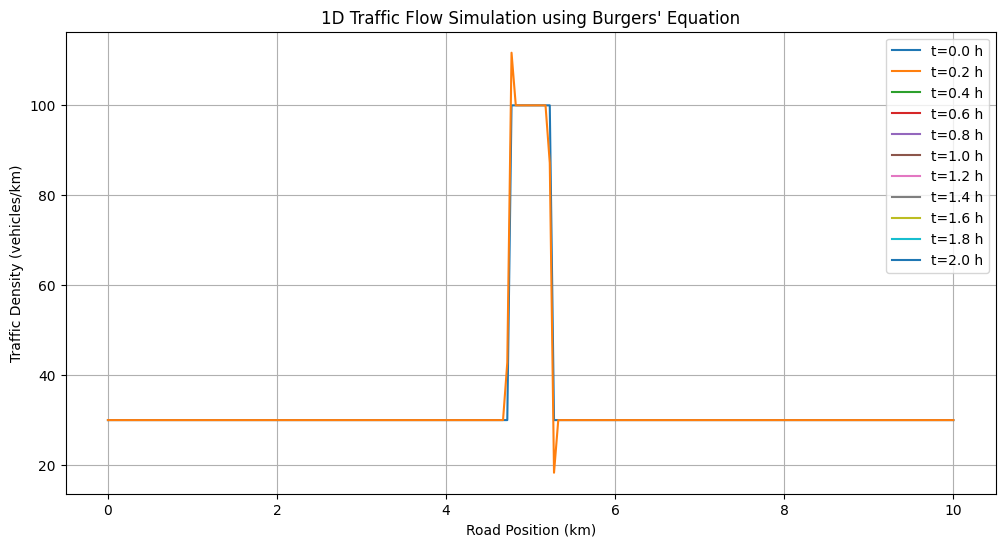

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
nx = 200            # Number of spatial points
L = 10.0            # Length of the road (km)
dx = L / (nx - 1)   # Spatial step size (km)
T = 2.0             # Total time (hours)
nt = 10000           # Number of time steps
dt = T / nt         # Time step size (hours)

# Traffic Parameters
V_max = 120.0       # Maximum velocity (km/h)
rho_max = 150.0     # Maximum density (vehicles/km)
nu = 0.1            # Viscosity coefficient (vehicles/(km^2·h))

# Stability Condition (CFL)
CFL = V_max * dt / dx
if CFL > 1:
    print(f"CFL condition not met: CFL={CFL:.2f} > 1.0. Reduce dt or increase dx.")
    exit()

# Initialize Traffic Density (vehicles/km)
rho = np.ones(nx) * 30.0  # Initial uniform density

# Perturbation: Traffic Jam at x = L/2
rho[int(nx/2 - 5):int(nx/2 + 5)] = 100.0

# Function to compute flux
def flux(rho):
    return V_max * rho * (1 - 2 * rho / rho_max)

# Initialize density history for visualization
rho_history = [rho.copy()]

# Time-stepping loop
for n in range(nt):
    rho_old = rho.copy()
    
    # Compute fluxes at interfaces
    F = flux(rho_old)
    
    # Compute density updates using central differences for convection and second-order for diffusion
    # Upwind schemes are also possible for better stability
    # Here, we use a simple explicit scheme
    
    # Compute derivatives
    dF_dx = np.zeros(nx)
    dF_dx[1:-1] = (F[2:] - F[0:-2]) / (2 * dx)
    
    d2rho_dx2 = np.zeros(nx)
    d2rho_dx2[1:-1] = (rho_old[2:] - 2 * rho_old[1:-1] + rho_old[0:-2]) / dx**2
    
    # Update density
    rho[1:-1] = rho_old[1:-1] - dt * dF_dx[1:-1] + nu * dt * d2rho_dx2[1:-1]
    
    # Boundary Conditions
    # Open boundaries: zero-gradient (Neumann)
    rho[0] = rho[1]
    rho[-1] = rho[-2]
    
    # Store history for visualization
    if n % (nt // 10) == 0:
        rho_history.append(rho.copy())

# Plotting Results
plt.figure(figsize=(12, 6))
for i, rho_snapshot in enumerate(rho_history):
    plt.plot(np.linspace(0, L, nx), rho_snapshot, label=f't={i*(T/10):.1f} h')

plt.xlabel('Road Position (km)')
plt.ylabel('Traffic Density (vehicles/km)')
plt.title('1D Traffic Flow Simulation using Burgers\' Equation')
plt.legend()
plt.grid(True)
plt.show()


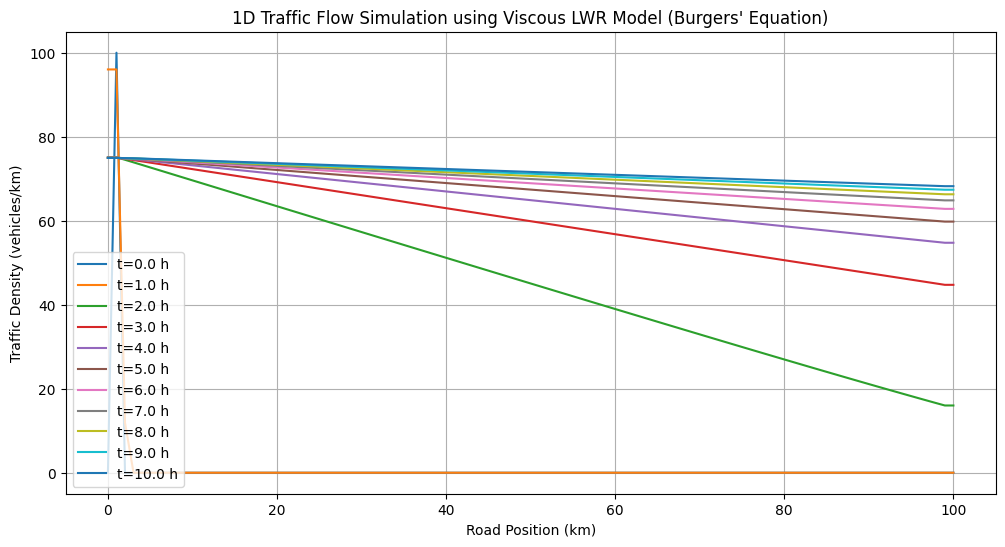

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
nx = 100           # Number of spatial points
L = 100.0            # Length of the road (km)
dx = L / (nx - 1)   # Spatial step size (km)
T = 10.0             # Total simulation time (hours)
nt = 10000           # Number of time steps
dt = T / nt         # Time step size (hours)

# Traffic Parameters
V_max = 120.0       # Maximum velocity (km/h)
rho_max = 150.0     # Maximum density (vehicles/km)
nu = 0.1            # Diffusion coefficient (vehicles/(km^2·h))

# Stability Condition (CFL)
CFL = (V_max * dt) / dx
if CFL > 1:
    print(f"CFL condition not met: CFL={CFL:.2f} > 1.0. Reduce dt or increase dx.")
    exit()

# Initialize Traffic Density (vehicles/km)
rho = np.ones(nx) * 0  # Initial uniform density

# Perturbation: Traffic Jam at x = L/2
rho[int(1):int(2)] = 100.0

# Function to compute advection speed a(rho)
def a(rho):
    return V_max - (2 * V_max / rho_max) * rho

# Initialize density history for visualization
rho_history = [rho.copy()]

# Time-stepping loop
for n in range(nt):
    rho_old = rho.copy()
    
    # Compute advection speed
    a_rho = a(rho_old)
    
    # Compute flux using central differences for advection
    # a(rho) * rho is nonlinear; use upwind scheme for stability
    # Here, we use a simple upwind scheme based on sign of a_rho
    
    rho_new = rho.copy()
    
    for i in range(1, nx-1):
        if a_rho[i] > 0:
            # Upwind scheme: use left state
            d_rho_dx = (rho_old[i] - rho_old[i-1]) / dx
        else:
            # Upwind scheme: use right state
            d_rho_dx = (rho_old[i+1] - rho_old[i]) / dx
        
        # Compute diffusion term using central differences
        d2_rho_dx2 = (rho_old[i+1] - 2 * rho_old[i] + rho_old[i-1]) / dx**2
        
        # Update density
        rho_new[i] = rho_old[i] - dt * a_rho[i] * d_rho_dx + nu * dt * d2_rho_dx2
    
    # Apply boundary conditions
    # Open boundaries: zero-gradient (Neumann)
    rho_new[0] = rho_new[1]
    rho_new[-1] = rho_new[-2]
    
    # Update density
    rho = rho_new.copy()
    
    # Store history for visualization
    if n % (nt // 10) == 0:
        rho_history.append(rho.copy())

# Plotting Results
plt.figure(figsize=(12, 6))
for i, rho_snapshot in enumerate(rho_history):
    plt.plot(np.linspace(0, L, nx), rho_snapshot, label=f't={i*(T/10):.1f} h')

plt.xlabel('Road Position (km)')
plt.ylabel('Traffic Density (vehicles/km)')
plt.title('1D Traffic Flow Simulation using Viscous LWR Model (Burgers\' Equation)')
plt.legend()
plt.grid(True)
plt.show()
